In [62]:
import matplotlib.pyplot as plt
import numpy as np

In [72]:
def get_scores(filename):
    scores = []

    with open(filename, "rb") as file:
        current_scores = []
        for line in file:
            line = str(line)
            if 'outer cv' in line:
                temp = line.split('accuracy: ')
                score = temp[1].split(',')[0]
                current_scores.append(float(score))
                if 'outer cv number: 6' in line:
                    scores.append(current_scores)
                    current_scores = []

    return scores

scores = get_scores('../logs/lof_pca_nested_cv.log')


In [87]:
def box_plot(scores, algorithm, reduction, score_used):
    size = len(scores)
    plt.figure(figsize=(10,6))
    scores.reverse()
    plt.boxplot(scores, patch_artist=True, vert=True)

    plt.title('Boxplot for ' + algorithm + ' and ' + reduction + ' using ' + score_used)
    plt.xlabel('Number of components')
    plt.ylabel('Accuracy scores')

    max_n_components = 51 + (5 * (size - 1))
    plt.ylim(0, 1)
    plt.xticks(range(1, size + 1, 1), range(50, max_n_components, 5))
    y_ticks = np.arange(0, 1.1, 0.1)
    plt.gca().set_yticks(y_ticks)
    plt.gca().set_yticklabels([f'{y:.1f}' for y in y_ticks])

    plt.show()

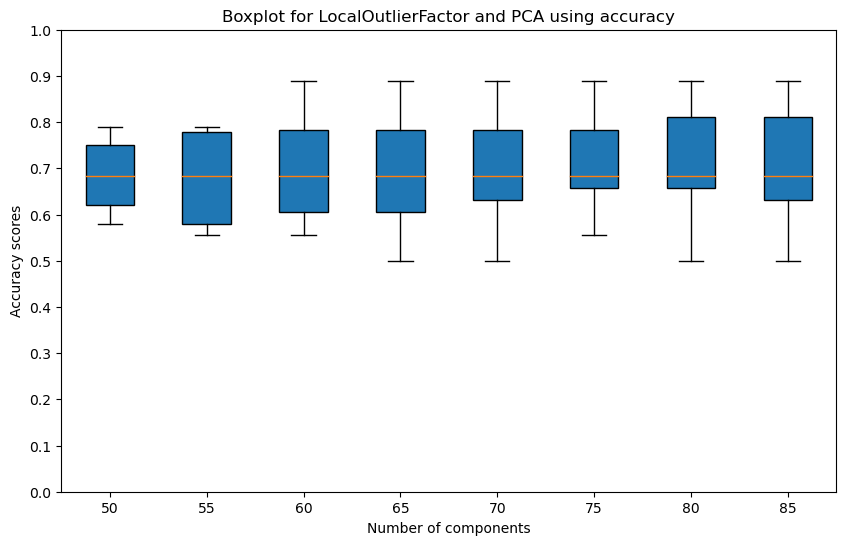

In [74]:

box_plot(scores[0:8], 'LocalOutlierFactor', 'PCA', 'accuracy')

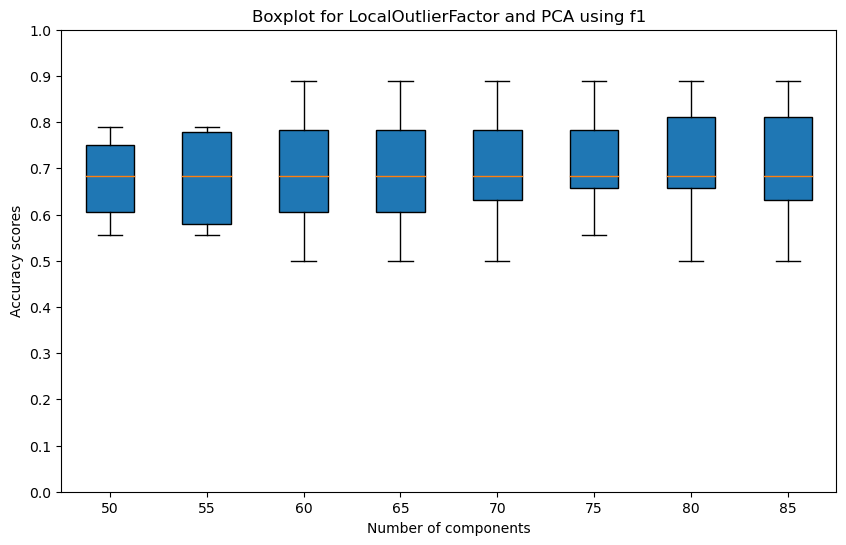

In [75]:
box_plot(scores[8:], 'LocalOutlierFactor', 'PCA', 'f1')

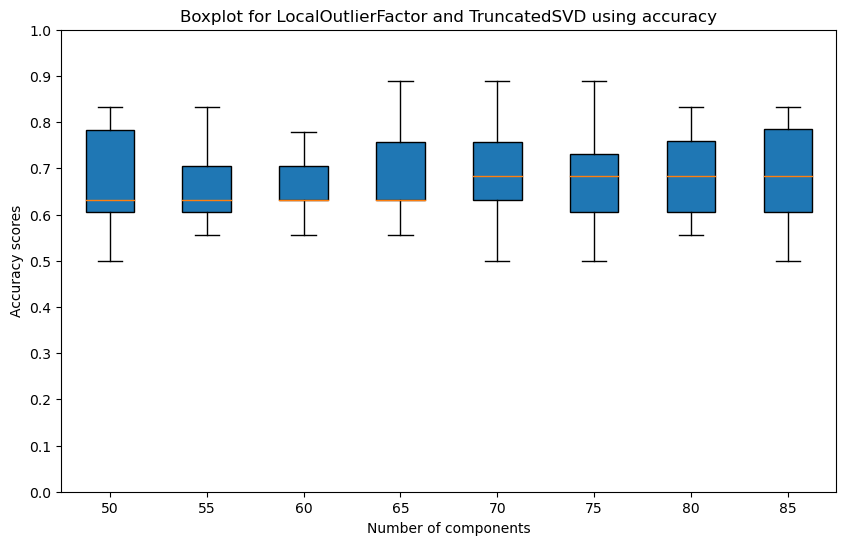

In [78]:
scores = get_scores('../logs/lof_svd_nested_cv.log')
box_plot(scores[0:8], 'LocalOutlierFactor', 'TruncatedSVD', 'accuracy')

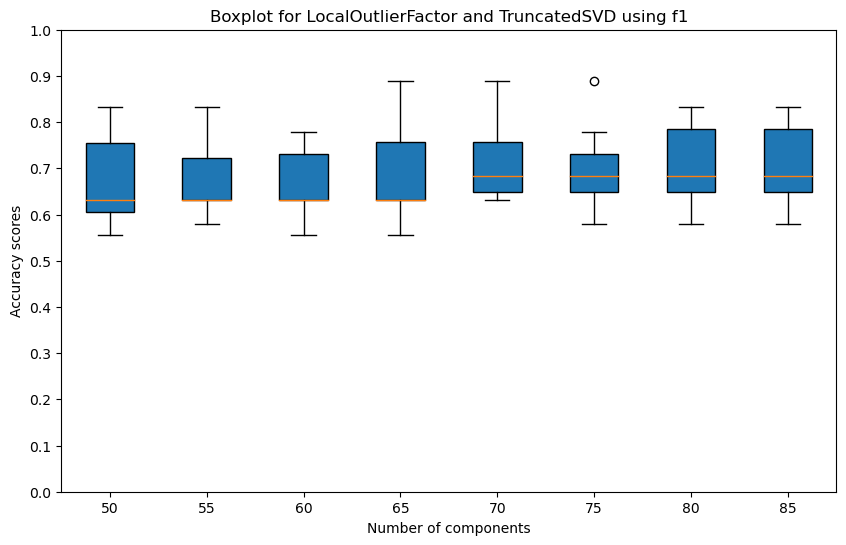

In [79]:
box_plot(scores[8:], 'LocalOutlierFactor', 'TruncatedSVD', 'f1')

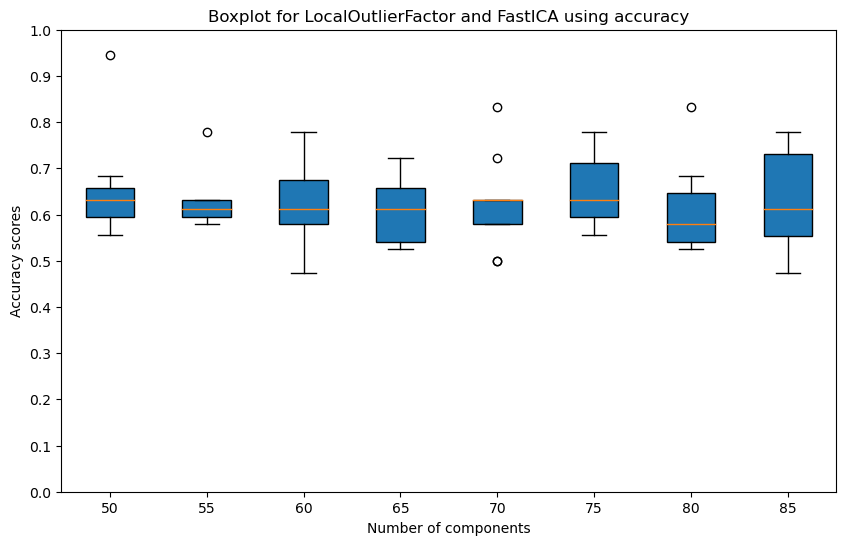

In [80]:
scores = get_scores('../logs/lof_fastica_nested_cv.log')
box_plot(scores[0:8], 'LocalOutlierFactor', 'FastICA', 'accuracy')

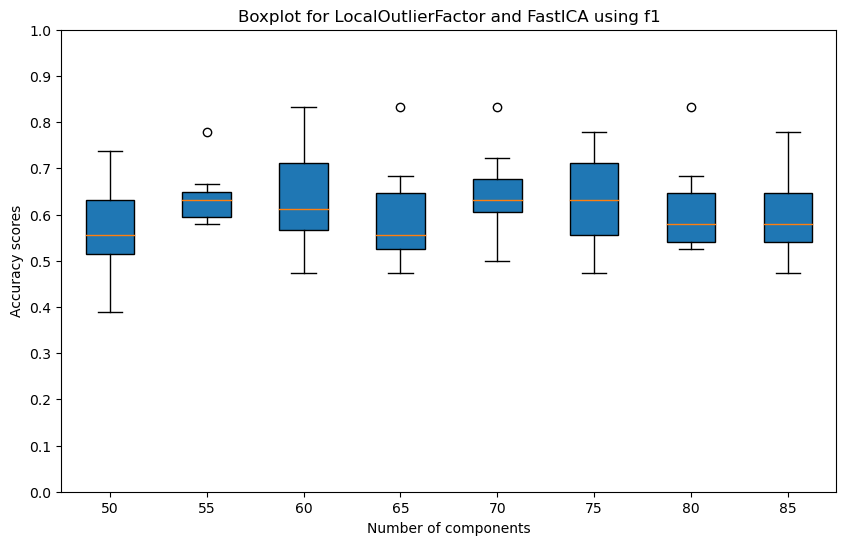

In [81]:
box_plot(scores[8:], 'LocalOutlierFactor', 'FastICA', 'f1')

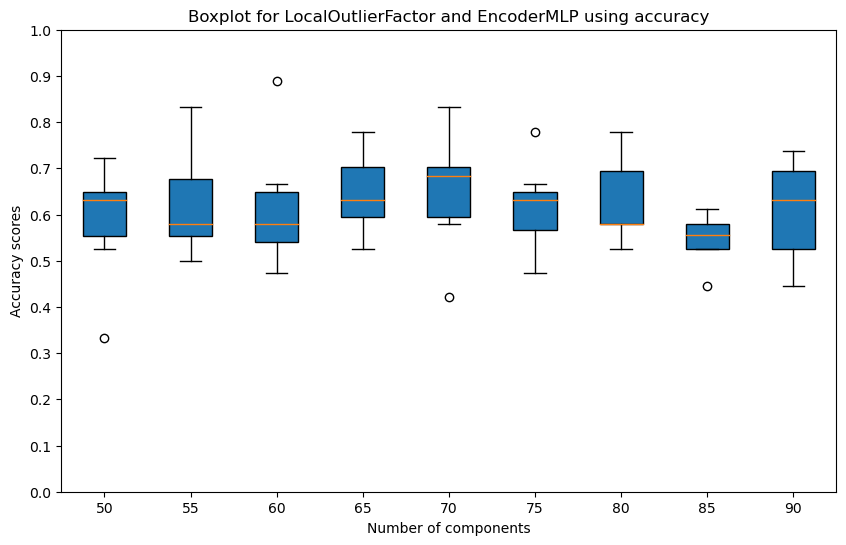

In [88]:
scores = get_scores('../logs/lof_neural_nested_cv.log')
box_plot(scores[0:9], 'LocalOutlierFactor', 'EncoderMLP', 'accuracy')

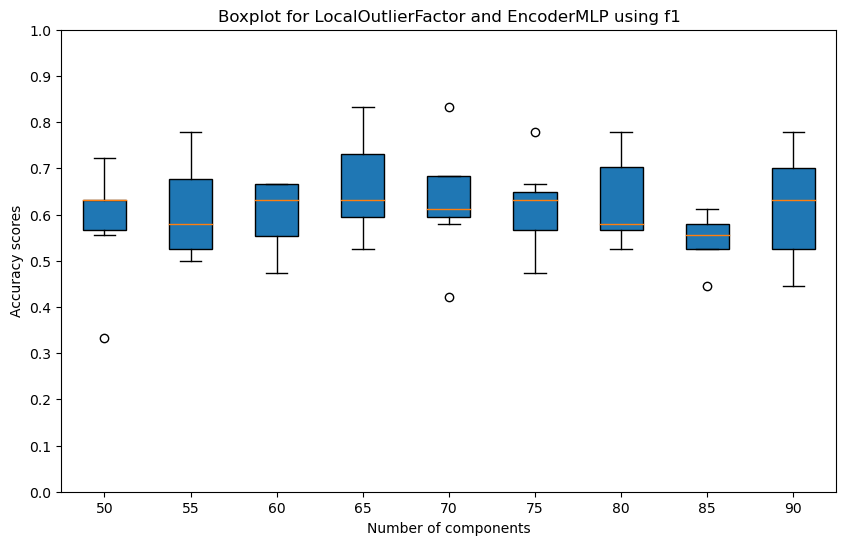

In [89]:
box_plot(scores[9:], 'LocalOutlierFactor', 'EncoderMLP', 'f1')

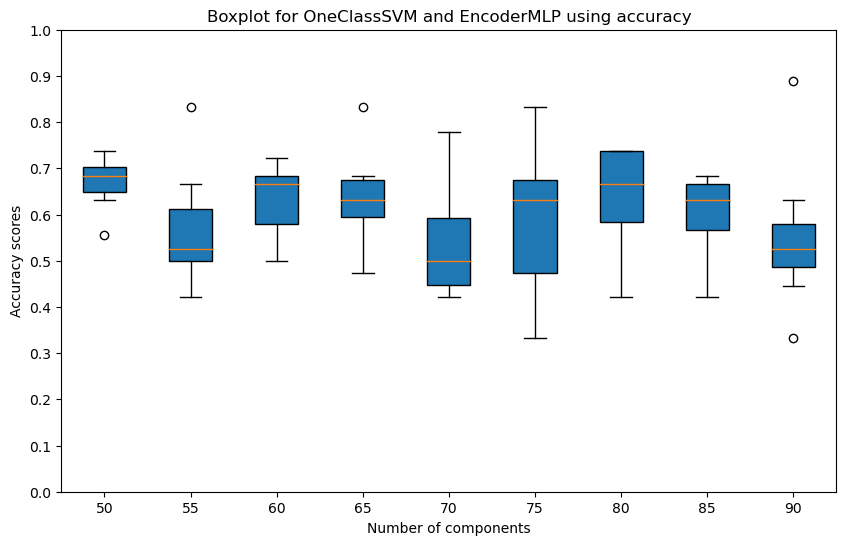

In [90]:
scores = get_scores('../logs/svm_neural_nested_cv.log')
box_plot(scores[0:9], 'OneClassSVM', 'EncoderMLP', 'accuracy')

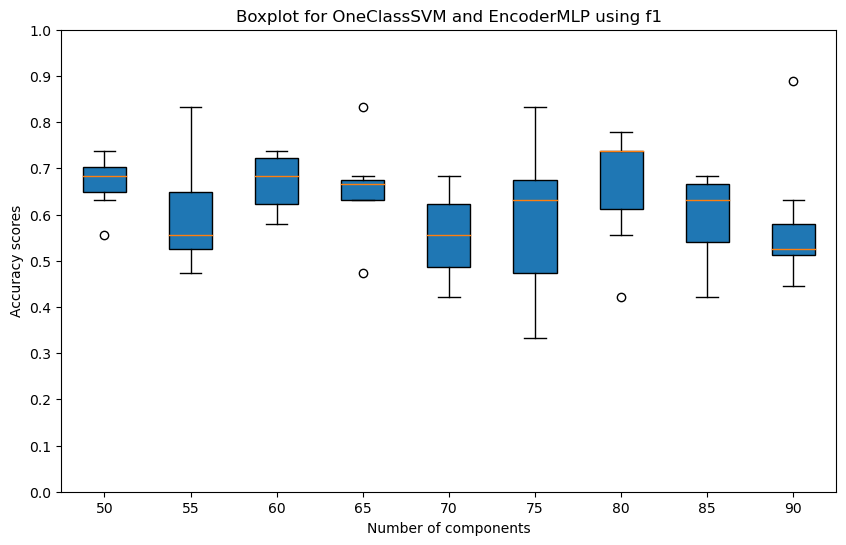

In [93]:
box_plot(scores[9:18], 'OneClassSVM', 'EncoderMLP', 'f1')